In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

# Read the files

In [2]:
col_names_profil = ['user-mboxsha1', 'gender', 'age', 'country', 'signup']
df_profil = pd.read_csv('../data/usersha1-profile.tsv', sep='\t', names=col_names_profil)
df_profil.head()

,user-mboxsha1,gender,age,country,signup
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007"
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007"
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006"
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008"
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006"


In [3]:
col_names = ['user-mboxsha1', 'musicbrainz-artist-id', 'artist-name', 'plays']

df = pd.read_csv('../data/usersha1-artmbid-artname-plays.tsv', sep='\t', names=col_names)
df.head()

,user-mboxsha1,musicbrainz-artist-id,artist-name,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


In [55]:
grouped_user = df[['user-mboxsha1', 'plays']].groupby('user-mboxsha1').sum()
grouped_user = grouped_user.sort_values(by='plays', ascending=False)

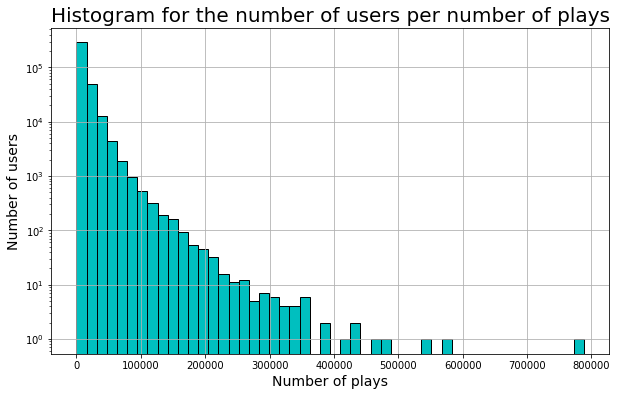

In [57]:
grouped_user.hist(bins=50, figsize=(10, 6), ec='black', color='c')
plt.yscale('log')
plt.title('Histogram for the number of users per number of plays', fontsize=20)
plt.xlabel('Number of plays', fontsize=14)
plt.ylabel('Number of users', fontsize=14)
plt.savefig('users_p_plays.pdf', bbox_inches='tight')

In [13]:
grouped = df[['artist-name', 'plays']].groupby('artist-name').sum()
grouped = grouped.sort_values(by='plays', ascending=False)

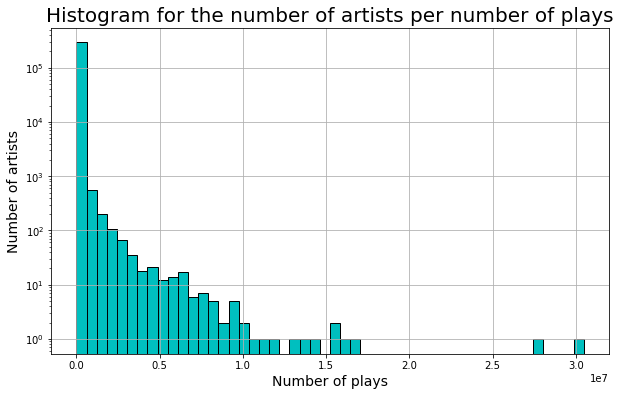

In [58]:
grouped.hist(bins=50, figsize=(10, 6), ec='black', color='c')
plt.yscale('log')
plt.title('Histogram for the number of artists per number of plays', fontsize=20)
plt.xlabel('Number of plays', fontsize=14)
plt.ylabel('Number of artists', fontsize=14)
plt.savefig('artists_p_plays.pdf', bbox_inches='tight')

In [4]:
col_names_profil_user = ['userid', 'timestamp', 'musicbrainz-artist-id', 'artist-name', 'musicbrainz-track-id', 'track-name']

df_profil_user = pd.read_csv('../data/userid-profile.tsv', sep='\t', names=col_names_profil_user)
df_profil_user.head()

,userid,timestamp,musicbrainz-artist-id,artist-name,musicbrainz-track-id,track-name
0,#id,gender,age,country,registered,NaN
1,user_000001,m,NaN,Japan,"Aug 13, 2006",NaN
2,user_000002,f,NaN,Peru,"Feb 24, 2006",NaN
3,user_000003,m,22,United States,"Oct 30, 2005",NaN
4,user_000004,f,NaN,NaN,"Apr 26, 2006",NaN


In [5]:
col_names_user = ['userid', 'gender', 'age', 'country', 'signup']

df_user = pd.read_csv('../data/userid-profile.tsv', sep='\t', names=col_names_user)
df_user.head()

,userid,gender,age,country,signup
0,#id,gender,age,country,registered
1,user_000001,m,NaN,Japan,"Aug 13, 2006"
2,user_000002,f,NaN,Peru,"Feb 24, 2006"
3,user_000003,m,22,United States,"Oct 30, 2005"
4,user_000004,f,NaN,NaN,"Apr 26, 2006"
